In [16]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
raw_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in raw_cities:
        raw_cities.append(city)

# Print the city count to confirm sufficient count
len(raw_cities)

612

In [18]:
# Initialize the List attributes.
cities = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# Initialize counters for print log
set_counter = 0;
record_counter = 0;

# Set the units to "imperial" to retrieve temperature in "Fahrenheit" and speed in Mph; units = "metric" would retrieve temperature in "Celsius" meter/sec
units = "imperial"

# Loggers followed by successive API calls for all the cities in the list.
print('Beginning Data Retrieval')
print('+++++++++++++++++++++++++++++')

# raw_cities = ['Seattle', 'Los Angeles', 'Chicago', 'New York']
for i, city in enumerate(raw_cities):
    
    # set/reset the logger counters 
    if(i % 50 == 0):
        set_counter += 1
        record_counter = 1
        
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    
    # API calls 
    try:
        query_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)

#       append the list elements only for valid cities
        if response.status_code == 200:
            weatherData = response.json()

            cities.append(weatherData['name'])
            lats.append(weatherData['coord']['lat'])
            lngs.append(weatherData['coord']['lon'])
            max_temps.append(weatherData['main']['temp_max'])
            humidities.append(weatherData['main']['humidity'])
            cloudinesses.append(weatherData['clouds']['all'])
            wind_speeds.append(weatherData['wind']['speed'])
            countries.append(weatherData['sys']['country'])
            dates.append(weatherData['dt'])
        else:
            print(f"City {city} not found. Skipping...")

    except e:
        print(f"City {city} not found. Skipping... {e}")
    
    record_counter += 1

#  API Call end logger    
print('+++++++++++++++++++++++++++++')
print('Data Retrieval Complete')
print('+++++++++++++++++++++++++++++')

Beginning Data Retrieval
+++++++++++++++++++++++++++++
processing Record 1 of Set 1 | kanniyakumari
processing Record 2 of Set 1 | wuchi
processing Record 3 of Set 1 | port hardy
processing Record 4 of Set 1 | te anau
processing Record 5 of Set 1 | longyearbyen
processing Record 6 of Set 1 | fortuna
processing Record 7 of Set 1 | hermanus
processing Record 8 of Set 1 | albany
processing Record 9 of Set 1 | qaanaaq
processing Record 10 of Set 1 | marsh harbour
processing Record 11 of Set 1 | saskylakh
processing Record 12 of Set 1 | omboue
processing Record 13 of Set 1 | busselton
processing Record 14 of Set 1 | rikitea
processing Record 15 of Set 1 | nizhneyansk
City nizhneyansk not found. Skipping...
processing Record 16 of Set 1 | kabanjahe
processing Record 17 of Set 1 | saint-donat-de-montcalm
processing Record 18 of Set 1 | bathsheba
processing Record 19 of Set 1 | evensk
processing Record 20 of Set 1 | tunxi
City tunxi not found. Skipping...
processing Record 21 of Set 1 | kaitan

processing Record 29 of Set 4 | bluff
processing Record 30 of Set 4 | grindavik
processing Record 31 of Set 4 | katsuura
processing Record 32 of Set 4 | hithadhoo
processing Record 33 of Set 4 | soubre
processing Record 34 of Set 4 | kodinsk
processing Record 35 of Set 4 | cradock
processing Record 36 of Set 4 | piacabucu
processing Record 37 of Set 4 | khatanga
processing Record 38 of Set 4 | kazalinsk
City kazalinsk not found. Skipping...
processing Record 39 of Set 4 | taiyuan
processing Record 40 of Set 4 | potosi
processing Record 41 of Set 4 | neuquen
processing Record 42 of Set 4 | goundam
processing Record 43 of Set 4 | ponta do sol
processing Record 44 of Set 4 | dunedin
processing Record 45 of Set 4 | puerto ayora
processing Record 46 of Set 4 | chuy
processing Record 47 of Set 4 | geraldton
processing Record 48 of Set 4 | yatou
processing Record 49 of Set 4 | quepos
processing Record 50 of Set 4 | pangnirtung
processing Record 1 of Set 5 | belushya guba
City belushya guba no

processing Record 14 of Set 8 | portales
processing Record 15 of Set 8 | sobolevo
processing Record 16 of Set 8 | sechura
processing Record 17 of Set 8 | anahuac
processing Record 18 of Set 8 | hasaki
processing Record 19 of Set 8 | balsas
processing Record 20 of Set 8 | encruzilhada do sul
processing Record 21 of Set 8 | beloha
processing Record 22 of Set 8 | santa maria del oro
processing Record 23 of Set 8 | mancio lima
processing Record 24 of Set 8 | vardo
processing Record 25 of Set 8 | lar
processing Record 26 of Set 8 | okhotsk
processing Record 27 of Set 8 | bereda
processing Record 28 of Set 8 | khandyga
processing Record 29 of Set 8 | ano korakiana
City ano korakiana not found. Skipping...
processing Record 30 of Set 8 | bassano
processing Record 31 of Set 8 | laguna
processing Record 32 of Set 8 | avera
processing Record 33 of Set 8 | moissala
processing Record 34 of Set 8 | moengo
processing Record 35 of Set 8 | todos santos
processing Record 36 of Set 8 | buchanan
processi

processing Record 47 of Set 11 | karauzyak
City karauzyak not found. Skipping...
processing Record 48 of Set 11 | orsha
processing Record 49 of Set 11 | kiunga
processing Record 50 of Set 11 | tiarei
processing Record 1 of Set 12 | sioux lookout
processing Record 2 of Set 12 | marshalltown
processing Record 3 of Set 12 | samalaeulu
City samalaeulu not found. Skipping...
processing Record 4 of Set 12 | la asuncion
processing Record 5 of Set 12 | severnyy
processing Record 6 of Set 12 | charters towers
processing Record 7 of Set 12 | lithgow
processing Record 8 of Set 12 | kurumkan
processing Record 9 of Set 12 | tocopilla
processing Record 10 of Set 12 | progreso
processing Record 11 of Set 12 | cascais
processing Record 12 of Set 12 | ndola
processing Record 13 of Set 12 | sahrak
City sahrak not found. Skipping...
processing Record 14 of Set 12 | bud
processing Record 15 of Set 12 | coihaique
processing Record 16 of Set 12 | den helder
processing Record 17 of Set 12 | massakory
process

# Insert Raw Data in Dataframe

In [21]:
# Convert Raw Data into DataFrame

cityWeatherDF = pd.DataFrame({
    "City": cities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudinesses,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
})

In [22]:
#  Display the DataFrame

cityWeatherDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kanniyākumāri,8.0833,77.5667,75.58,79,26,15.46,IN,1672440547
1,Wuchi,29.3786,103.0230,27.79,95,100,2.15,CN,1672440548
2,Port Hardy,50.6996,-127.4199,42.98,100,100,18.41,CA,1672439970
3,Te Anau,-45.4167,167.7167,61.65,56,83,2.24,NZ,1672440092
4,Longyearbyen,78.2186,15.6401,26.44,68,40,18.41,SJ,1672440006
...,...,...,...,...,...,...,...,...,...
549,Comodoro Rivadavia,-45.8667,-67.5000,67.86,26,0,16.11,AR,1672440913
550,Skjervøy,70.0311,20.9714,28.40,72,94,21.56,NO,1672440914
551,Remedios,22.4947,-79.5458,76.17,85,1,15.01,CU,1672440915
552,Ucluelet,48.9329,-125.5528,48.09,92,97,16.71,CA,1672440916


In [23]:
# Validate the record counts and all the columns have the same number of records.

cityWeatherDF.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [24]:
# There are more than 500 Unique Cities taken for the analysis

cityWeatherDF.nunique()

City          553
Lat           553
Lng           552
Max Temp      509
Humidity       80
Cloudiness     96
Wind Speed    347
Country       115
Date          393
dtype: int64

In [25]:
# Export Data into .csv file
cityWeatherDF.to_csv("../Output/city_weather.csv", index=False)

# Inspect the data and remove the cities where the humidity > 100%.

In [26]:
#Skip if no cities with humidity of 100%

cityWeatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.447244,17.043571,52.020776,76.220217,60.259928,8.269170,1.672441e+09
std,33.495606,90.576049,30.328856,18.945584,39.057304,6.400862,1.972420e+02
min,-54.800000,-175.200000,-40.670000,9.000000,0.000000,0.000000,1.672440e+09
25%,-9.765200,-63.796750,37.000000,68.000000,20.000000,3.627500,1.672441e+09
50%,20.115950,17.150300,62.845000,80.000000,75.000000,6.810000,1.672441e+09
75%,46.427050,101.729225,74.640000,90.000000,99.000000,11.165000,1.672441e+09
max,78.218600,179.316700,95.040000,100.000000,100.000000,38.700000,1.672441e+09


## Focusing on humidity values, we find that 20 cities have 100% humidity.

In [31]:
#  Get the indices of cities that have humidity over 100%.
cityWeatherDF.loc[cityWeatherDF['Humidity'] > 99]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port Hardy,50.6996,-127.4199,42.98,100,100,18.41,CA,1672439970
15,Saint-Donat-de-Montcalm,46.3187,-74.2219,39.83,100,100,4.12,CA,1672440561
42,Pevek,69.7008,170.3133,-35.68,100,88,4.70,RU,1672440104
47,Kargasok,59.0556,80.8572,-20.34,100,89,2.15,RU,1672440581
54,Srednekolymsk,67.4500,153.6833,-39.10,100,98,0.83,RU,1672440031
115,Chokurdakh,70.6333,147.9167,-35.48,100,81,4.43,RU,1672440636
134,Belaya Gora,68.5333,146.4167,-24.74,100,97,1.57,RU,1672440646
135,Yar-Sale,66.8333,70.8333,-25.55,100,64,3.78,RU,1672440647
141,Koshurnikovo,54.1667,93.3000,-6.50,100,100,3.60,RU,1672440651
149,Chapais,49.7834,-74.8492,40.78,100,100,10.78,CA,1672440474


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityWeatherDF = cityWeatherDF.loc[cityWeatherDF['Humidity'] <= 100]
cleanCityWeatherDF.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kanniyākumāri,8.0833,77.5667,75.58,79,26,15.46,IN,1672440547
1,Wuchi,29.3786,103.0230,27.79,95,100,2.15,CN,1672440548
2,Port Hardy,50.6996,-127.4199,42.98,100,100,18.41,CA,1672439970
3,Te Anau,-45.4167,167.7167,61.65,56,83,2.24,NZ,1672440092
4,Longyearbyen,78.2186,15.6401,26.44,68,40,18.41,SJ,1672440006
5,Fortuna,40.5982,-124.1573,60.93,97,40,13.80,US,1672440186
6,Hermanus,-34.4187,19.2345,63.81,72,0,17.52,ZA,1672440551
7,Albany,42.6001,-73.9662,45.41,72,100,2.30,US,1672440356
8,Qaanaaq,77.4840,-69.3632,-23.26,65,28,7.74,GL,1672440552
9,Marsh Harbour,26.5412,-77.0636,75.70,83,12,9.71,BS,1672440490


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# 
Latitude vs. Temperature Plot

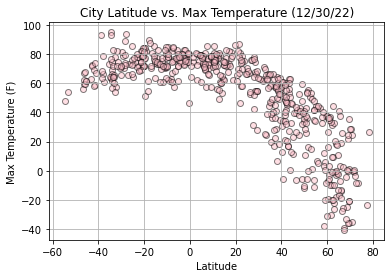

In [34]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Max Temp']

plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_MaxTemp.png")
plt.show()

In [35]:
# Latitude vs. Humidity Plot


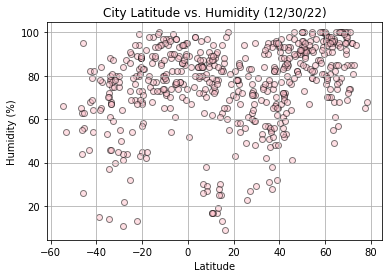

In [36]:
x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Humidity']

plt.title(f'City Latitude vs. Humidity ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Humidity.png")
plt.show()

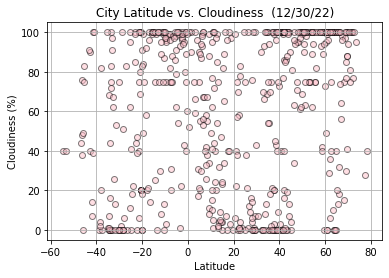

In [37]:
# Latitude vs. Cloudiness Plot

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Cloudiness']

plt.title(f'City Latitude vs. Cloudiness  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_Cloudiness.png")
plt.show()

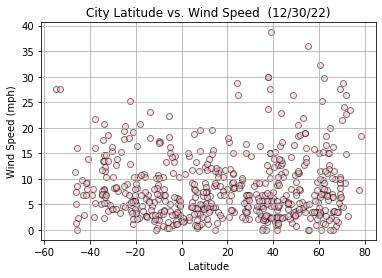

In [38]:
# Latitude vs. Wind Speed

x = cleanCityWeatherDF['Lat']
y = cleanCityWeatherDF['Wind Speed']

plt.title(f'City Latitude vs. Wind Speed  ({time.strftime("%x")})')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x, y, color="pink", alpha=0.5, edgecolors="black")
plt.grid()
plt.savefig("../Images/WeatherPy_CityLat_vs_WindSpeed.png")
plt.show()

In [39]:
# Linear Regression


def plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) # linregress - helps find the best line equation for the data in the scatter plot

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(x_values,y_values, color='pink', alpha=0.5, edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotate_coords,fontsize=13,color="black")
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(plot_location)
    plt.show()


In [40]:
# Create Northern and Southern Hemisphere DataFrames
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude greater than 0 are considered to be part of Northern Hemisphere,
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

northernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] >= 0)]
northernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kanniyākumāri,8.0833,77.5667,75.58,79,26,15.46,IN,1672440547
1,Wuchi,29.3786,103.0230,27.79,95,100,2.15,CN,1672440548
2,Port Hardy,50.6996,-127.4199,42.98,100,100,18.41,CA,1672439970
4,Longyearbyen,78.2186,15.6401,26.44,68,40,18.41,SJ,1672440006
5,Fortuna,40.5982,-124.1573,60.93,97,40,13.80,US,1672440186


In [41]:
# Since Equator represents 0 degree Latitude; 
#     all cities with Latitude less than 0 are considered to be in Southern Hemisphere

southernHemisphereDF = cleanCityWeatherDF.loc[(cleanCityWeatherDF['Lat'] < 0)]
southernHemisphereDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Te Anau,-45.4167,167.7167,61.65,56,83,2.24,NZ,1672440092
6,Hermanus,-34.4187,19.2345,63.81,72,0,17.52,ZA,1672440551
11,Omboué,-1.5746,9.2618,78.10,86,43,5.14,GA,1672440554
12,Busselton,-33.6500,115.3333,64.81,68,100,11.63,AU,1672440554
13,Rikitea,-23.1203,-134.9692,77.83,69,85,5.08,PF,1672440556


In [42]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

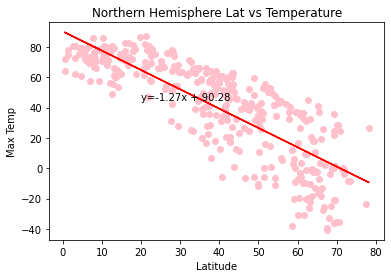

In [43]:
plt.scatter(northernHemisphereDF["Lat"], northernHemisphereDF["Max Temp"], color='pink')
x_axis = northernHemisphereDF["Lat"]
y_axis = northernHemisphereDF["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Lat vs Temperature")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_value = x_axis * slope + intercept
plt.plot(x_axis, regress_value,"r-")
line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
plt.annotate(line_eq, (20,45))
plt.show()

The r-squared is: 0.6838331606161137


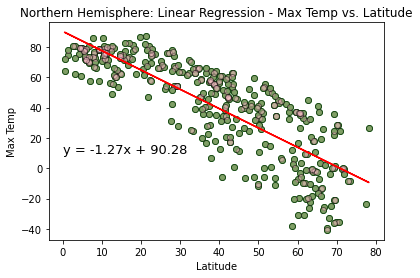

In [44]:
# Add the linear regression equation and line to plot
plt.scatter(northernHemisphereDF['Lat'],northernHemisphereDF['Max Temp'], color='green')
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Max Temp']


plot_title = "Northern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (0,10)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.1112532161910413


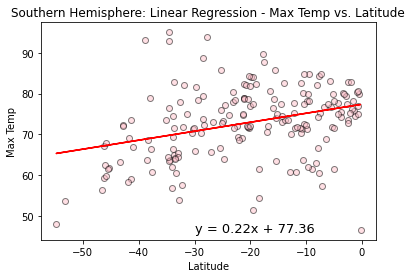

In [45]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Max Temp']

plot_title = "Southern Hemisphere: Linear Regression - Max Temp vs. Latitude"
annotate_coords = (-30,46)
x_label = 'Latitude'
y_label = 'Max Temp'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_MaxTemp.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.12615709654350277


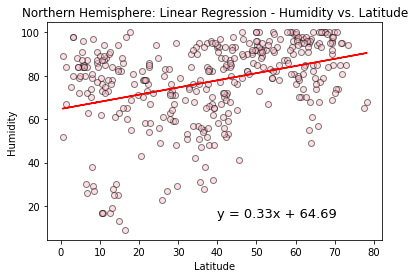

In [46]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Humidity']

plot_title = "Northern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.21363001102110185


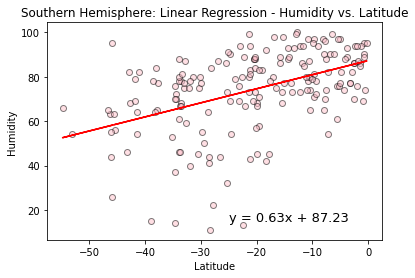

In [47]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Humidity']

plot_title = "Southern Hemisphere: Linear Regression - Humidity vs. Latitude"
annotate_coords = (-25,15)
x_label = 'Latitude'
y_label = 'Humidity'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Humidity.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.07310402016526736


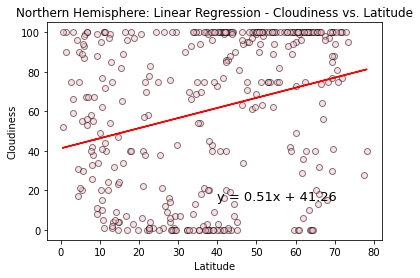

In [48]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Cloudiness']

plot_title = "Northern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (40,15)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.1689123172104346


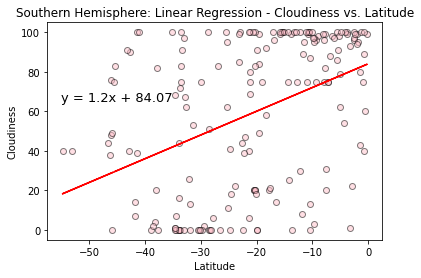

In [49]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Cloudiness']

plot_title = "Southern Hemisphere: Linear Regression - Cloudiness vs. Latitude"
annotate_coords = (-55,65)
x_label = 'Latitude'
y_label = 'Cloudiness'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Cloudiness.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.0199622017577531


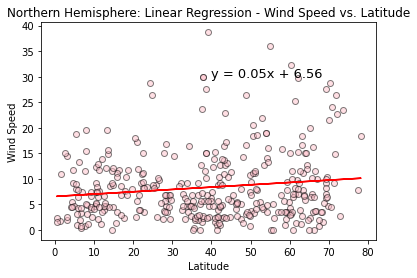

In [50]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = northernHemisphereDF['Lat']
y_values = northernHemisphereDF['Wind Speed']

plot_title = "Northern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (40,30)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_NorthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)

The r-squared is: 0.06217005253223907


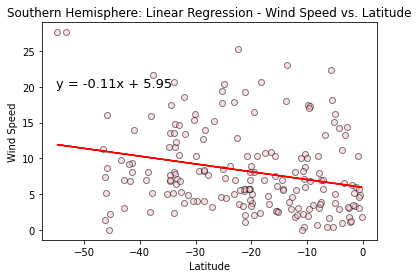

In [51]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Add the linear regression equation and line to plot
x_values = southernHemisphereDF['Lat']
y_values = southernHemisphereDF['Wind Speed']

plot_title = "Southern Hemisphere: Linear Regression - Wind Speed vs. Latitude"
annotate_coords = (-55,20)
x_label = 'Latitude'
y_label = 'Wind Speed'
plot_location = "../Images/WeatherPy_SouthernHemisphere_Latitude_vs_Wind Speed.png"

plot_linear_regression(x_values, y_values, plot_title, annotate_coords, x_label, y_label, plot_location)